In [1]:
import pypsa 
import xarray as xr
import atlite
import pandas as pd
import dill as pickle
import geopandas as gpd


/Users/asiazhang/miniforge3/envs/pypsa-usa/lib/python3.11/site-packages/atlite/resource.py:20: DeprecationWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html



In [244]:
vmin = 0.17
vmax = 0.33

## Testing Shapes

<Axes: >

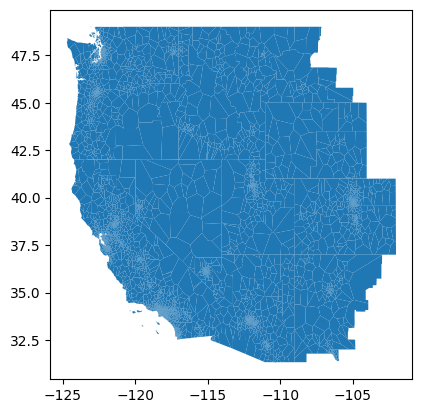

In [3]:
##load geojsonfile
gdf_shapes = gpd.read_file("/Users/asiazhang/Local Docs/pypsa-usa/workflow/resources/Default/western/Geospatial/regions_onshore.geojson")

# Ensure it's in a projected coordinate reference system (CRS)
gdf_shapes = gdf_shapes.to_crs(epsg=4326)
gdf_shapes.plot()


<Axes: >

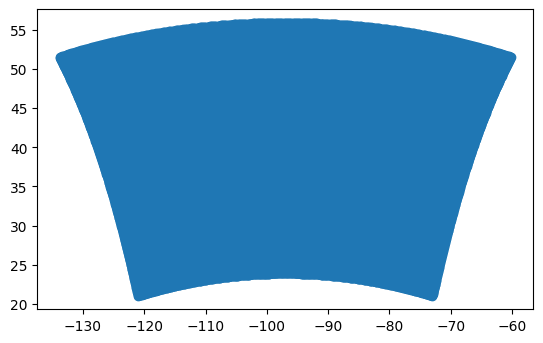

In [4]:
##create list of coordinates from ds to load into a geodataframe
coords_list = list(zip(ds.x.values.flatten(), ds.y.values.flatten()))
##convert to geodataframe
df_points = pd.DataFrame(coords_list, columns=["longitude", "latitude"])
gdf_points = gpd.GeoDataFrame(df_points, 
                              geometry=gpd.points_from_xy(df_points.longitude, df_points.latitude), 
                              crs="EPSG:4326")
gdf_points.geometry.plot()

In [9]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Filter for the United States
us_map = world[world["ADMIN"] == "United States of America"]

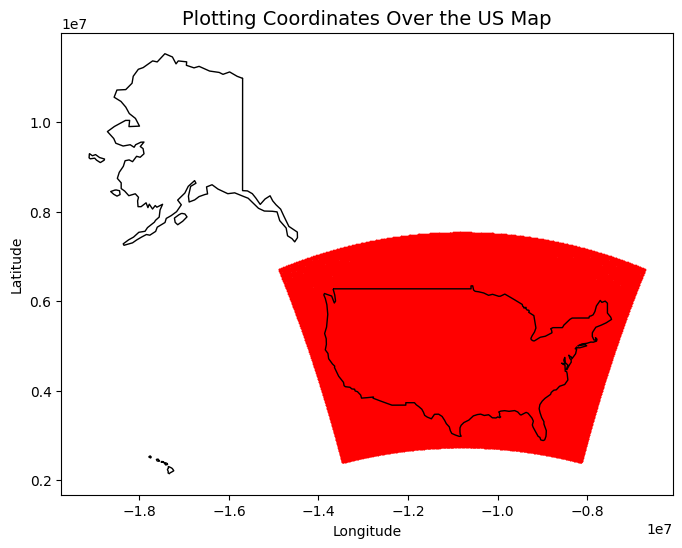

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


# Convert to Web Mercator (required for adding basemap)
us_map = us_map.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
us_map.boundary.plot(ax=ax, color="black", linewidth=1)  # Plot US boundaries
gdf_points.plot(ax=ax, color="red", markersize=0.5, edgecolor="red", linewidth=0.5)  # Plot points

# Add basemap
#ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain, alpha=0.5)

# Add title and labels
ax.set_title("Plotting Coordinates Over the US Map", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [154]:
gdf_joined = gpd.sjoin(gdf_points, gdf_shapes, how="right", predicate="within")
#print(gdf_joined[['longitude', 'latitude', 'geometry', 'name']])
gdf_joined

,index_left,longitude,latitude,name,x,y,country,geometry
0,105193.0,-124.646683,47.965832,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105194.0,-124.493683,47.996811,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105195.0,-124.340515,48.027626,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105618.0,-124.539932,48.099224,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
0,105619.0,-124.386536,48.130081,35000,-124.578,48.2414,p2,"POLYGON ((-124.17042 48.12051, -124.55029 47.8..."
...,...,...,...,...,...,...,...,...
4749,95947.0,-111.116089,47.604843,39713,-111.123,47.5699,p18,"POLYGON ((-111.13355 47.79409, -111.08401 47.5..."
4749,96371.0,-111.139954,47.710739,39713,-111.123,47.5699,p18,"POLYGON ((-111.13355 47.79409, -111.08401 47.5..."
4750,96372.0,-110.982544,47.726734,39714,-111.061,47.5817,p18,"POLYGON ((-111.06249 48.01884, -110.82817 47.7..."
4750,96796.0,-111.006226,47.832623,39714,-111.061,47.5817,p18,"POLYGON ((-111.06249 48.01884, -110.82817 47.7..."


/var/folders/51/g6s5m1bd6ts2821wgq17c8600000gn/T/ipykernel_3382/3424759611.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



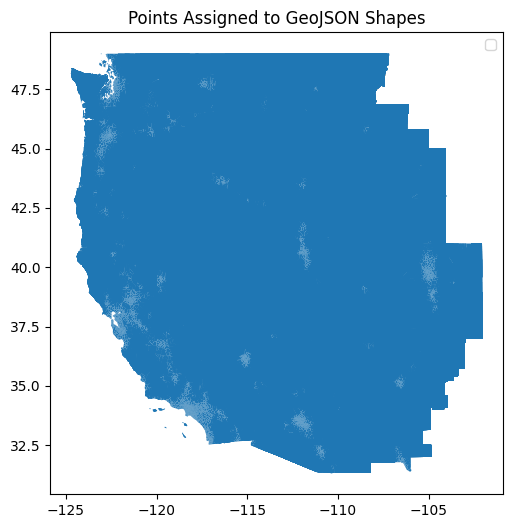

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the polygons (GeoJSON shapes)
#gdf_shapes.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot the points
#gdf_points.plot(ax=ax, marker='o', color='red', markersize=5)

gdf_joined.plot(ax=ax)

# Add legend
plt.legend()
plt.title("Points Assigned to GeoJSON Shapes")
plt.show()

## Plot California Existing PyPSA Data

In [1]:
solar = xr.open_dataset('/Users/asiazhang/Local Docs/pypsa-usa/workflow/resources/Tutorial/western/profile_solar.nc')

NameError: name 'xr' is not defined

In [238]:
df_solar = solar['profile'].to_dataframe().reset_index()
df_solar_avg = df_solar.groupby('bus').mean()

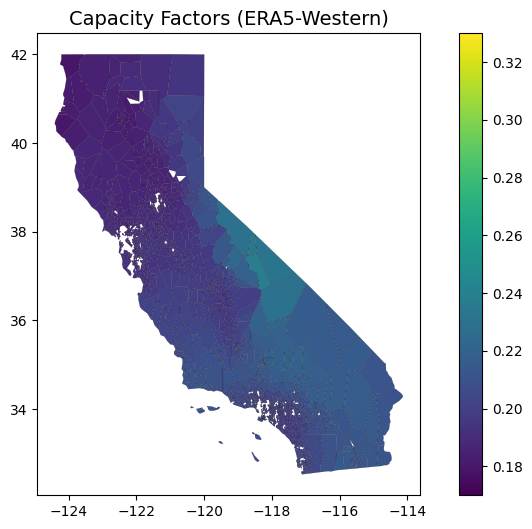

In [245]:
## plot of existing pypsa data
solar_gdf_shapes = gdf_shapes.merge(df_solar_avg, left_on="name", right_on="bus", how="left") #merging geoshapes to CFs
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the shapes with capacity factor as color
solar_gdf_shapes.plot(ax=ax, column="profile", cmap="viridis", legend=True, edgecolor="black", linewidth = 0.1, vmin=vmin, vmax=vmax)

ax.set_title("Capacity Factors (ERA5-Western)", fontsize=14)  # Set plot title
plt.show()

# Plot GODEEP

In [2]:
ds = xr.open_dataset('/Users/asiazhang/Downloads/solar_rcp85hotter_2020_2059/solar_gen_cf_2055.nc')
#ds = xr.open_dataset('/Users/asiazhang/solar_rcp45hotter_2020_2059/solar_gen_cf_2050.nc')

## convert Time to [datetime64] type
ds["Time"] = pd.to_datetime(ds["Time"].values, unit="ns").astype("datetime64[ns]")
ds["Time"].values
## Renaming columns in ds.coords
ds = ds.rename({"Time": "time", "XLONG": "x", "XLAT": "y"})

coords_list_gd = list(zip(ds.x.values.flatten(), ds.y.values.flatten(), ds.capacity_factor.mean(dim='time').values.flatten()))
df_points_gd = pd.DataFrame(coords_list_gd, columns=["longitude", "latitude", "capacity_factor"])
gdf_points_gd = gpd.GeoDataFrame(df_points_gd, 
                           geometry=gpd.points_from_xy(df_points_gd.longitude, df_points_gd.latitude), 
                            crs="EPSG:4326")

gdf_joined_gd = gpd.sjoin(gdf_points_gd, gdf_shapes, how="right", predicate="within") #get bus number and shape associated with godeeep coord


NameError: name 'gdf_shapes' is not defined

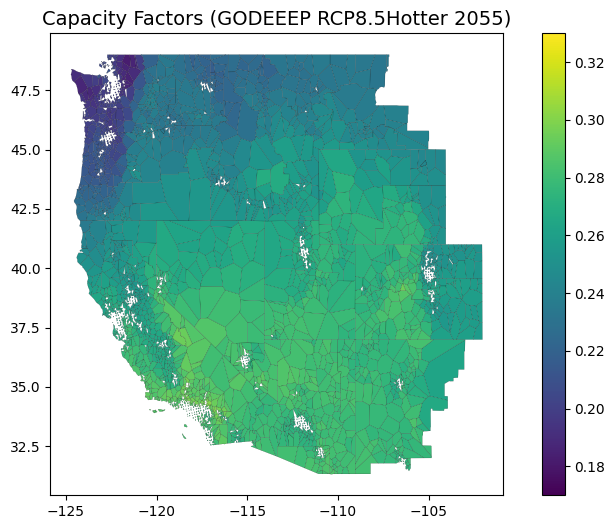

In [254]:
gdf_joined_gd_avg = gdf_joined_gd.groupby('name')['capacity_factor'].mean().reset_index()

solar_gdf_shapes_gd = gdf_shapes.merge(gdf_joined_gd_avg, on="name", how="left")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the shapes with capacity factor as color
solar_gdf_shapes_gd.plot(ax=ax, column="capacity_factor", cmap="viridis", legend=True, edgecolor="black", linewidth=0.1, vmin=vmin, vmax=vmax)
ax.set_title("Capacity Factors (GODEEEP RCP8.5Hotter 2055)", fontsize=14)  # Set plot title
plt.show()

In [ ]:
n = pypsa.Network('/Users/asiazhang/Local Docs/pypsa-usa/workflow/resources/Tutorial/western/elec_base_network_l_pp.nc')

INFO:pypsa.io:Imported network elec_base_network_l_pp.nc has buses, carriers, generators, lines, line_types, links, loads, storage_units, transformers
